# Where Migrants Are Going Missing in 2019

Using a dataset on Kaggle, I look into how many migrants end up missing or dead while en route to their destinations. This project will focus mainly on the migrant situation for 2019, and will evaluate the demographic breakdown as well as the reported causes and the regions these events have been reported. The dataset also looks into the number of survivors, as well as the number of children who were migrants.

In [2]:
#Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
migrants = pd.read_csv("MissingMigrants-Global-2019-03-29T18-36-07.csv")

In [4]:
#Filter the database to reports in the year 2019
migrants = pd.DataFrame(migrants, columns = ['Region of Incident', 'Reported Year', 
                                             'Reported Month','Number Dead','Minimum Estimated Number of Missing',
                                             'Total Dead and Missing', 'Number of Survivors', 'Number of Females',
                                             'Number of Males', 'Number of Children', 'Cause of Death', 'Migration Route'])
#Only getting information for the year 2019
## Reports go up to the month of March
migrants = migrants[migrants['Reported Year'] == 2019]

migrants.head()

,Region of Incident,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration Route
0,Mediterranean,2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,Eastern Mediterranean
1,Mediterranean,2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,Eastern Mediterranean
2,Mediterranean,2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,Western Mediterranean
3,Mediterranean,2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,Western Mediterranean
4,Central America,2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,NaN


In [5]:
#Calculating the total number of dead and missing migrants
total_dead_and_missing = pd.DataFrame(migrants, columns = ['Number Dead',
                                                           'Minimum Estimated Number of Missing',
                                                           'Total Dead and Missing',
                                                           'Number of Survivors'])
total_sum = total_dead_and_missing.sum()
total_count = pd.DataFrame(total_sum)
total_count

,0
Number Dead,311.0
Minimum Estimated Number of Missing,287.0
Total Dead and Missing,598.0
Number of Survivors,976.0


## Total Breakdown of The Status of Migrants Worldwide in 2019.

38% of all migrants in 2019 were reported to be dead or missing, while 62% survived their journeys. Calculating the mortality rate of being a migrant would be tricky considering those who have gone missing might not be necessarily dead, as any number of things couldve happened to any of the missing migrants reported missing. While a majority of migrants survive, the journey is proven to be dangerous given the high rates of those going missing while en route.

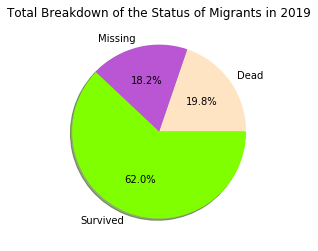

<Figure size 432x288 with 0 Axes>

In [11]:
#Pie Chart
Number_Dead = total_dead_and_missing['Number Dead'].sum()
Number_Missing = total_dead_and_missing['Minimum Estimated Number of Missing'].sum()
Number_Survivors = total_dead_and_missing['Number of Survivors'].sum()

Total_Reported_Migrants = [Number_Dead, Number_Missing, Number_Survivors]
colors = ['bisque', 'mediumorchid', 'chartreuse']
labels = ['Dead', 'Missing', 'Survived']
plt.pie(Total_Reported_Migrants, colors=colors, labels=labels, autopct = "%1.1f%%", shadow = True)
plt.title("Total Breakdown of the Status of Migrants in 2019")

plt.show()

# Save graph
plt.savefig("Visualizations/total_breakdown_of_migrants.png", dpi=180, bbox_inches="tight")

In [9]:
#Breaking down the number of instances by month
## January had the highest number of dead and missing migrants where Febuary had the least
Monthly_report_df = migrants.groupby("Reported Month").sum()
Monthly_report_df.reset_index()

,Reported Month,Reported Year,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children
0,Feb,102969,92.0,14.0,106,122.0,11.0,33.0,4.0
1,Jan,115083,146.0,197.0,343,651.0,17.0,35.0,15.0
2,Mar,70665,73.0,76.0,149,203.0,24.0,33.0,12.0


## A Look At Migrants on a Monthly Basis

Looking on the basis of just numbers, January had the greatest amount of migrants reported missing or dead, though it also reported the greatest amount of migrants total. While it seems that January may be the most dangerous month, it appears that January has a smaller percentage of migrants being lost en route when compared to Febuary and March, who see a larger percentage of migrants getting lost while on their way to their destination.

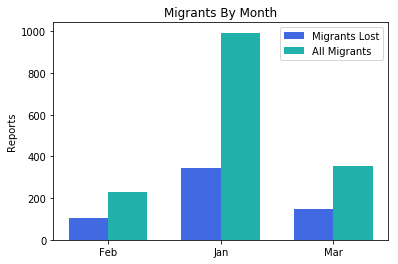

<Figure size 432x288 with 0 Axes>

In [12]:
Months = np.arange(len(Monthly_report_df))
total_lost = Monthly_report_df["Total Dead and Missing"]
total_migrants = Monthly_report_df["Total Dead and Missing"] + Monthly_report_df["Number of Survivors"]

#Creating the bar chart
width = 0.35
fig = plt.figure()
ax = fig.add_subplot(111)

lost_migrants = ax.bar(Months, total_lost, width, color = "royalblue")
total_number = ax.bar(Months + width, total_migrants, width, color = "lightseagreen")

ax.set_ylabel('Reports')
ax.set_title('Migrants By Month')
ax.set_xticks(Months + width / 2)
ax.set_xticklabels( ('Feb', 'Jan', 'Mar') )

ax.legend( (lost_migrants[0], total_number[0]), ('Migrants Lost', 'All Migrants') )

plt.show()

# Save graph
plt.savefig("Visualizations/migrants_by_month.png", dpi=180, bbox_inches="tight")

## Regions Where Reports of Missing Migrants are Most Frequent

Hotspots of migrant activity as of 2019 include Central America, the Mediterranean, and the US-Mexico border. For many of these migrants, their goal is to ultimately reach destinations such as the United States or Western Europe. Because these areas report many migrants going through these regions, they experience a relatively high rate of migrants going missing or ending up dead before they reach the end of their journey.

In [13]:
Regions_of_incident = migrants.groupby("Region of Incident").count()
Regions_of_incident 

,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration Route
Region of Incident,,,,,,,,,,,
Caribbean,2,2,2,0,2,2,0,1,0,2,0
Central America,19,19,19,0,19,5,1,18,1,19,0
Europe,8,8,8,0,8,2,0,8,0,8,4
Horn of Africa,1,1,1,1,1,1,1,1,0,1,1
Mediterranean,45,45,38,13,45,20,11,17,11,45,45
Middle East,3,3,3,0,3,0,1,2,0,3,0
North Africa,5,5,4,1,5,2,2,2,0,5,1
South America,4,4,4,1,4,1,0,2,3,4,0
Southeast Asia,1,1,1,1,1,0,1,0,0,1,0


In [14]:
Mediterranean = migrants[migrants["Region of Incident"] == "Mediterranean"]

#Groupby the leading causes of death for migrants in the Mediterranean
Mediterranean_leading_causes = Mediterranean.groupby("Cause of Death").sum()
Mediterranean_leading_causes_migrant_loss = pd.DataFrame(Mediterranean_leading_causes, columns = ["Total Dead and Missing"])
Mediterranean_leading_causes_migrant_loss


,Total Dead and Missing
Cause of Death,
Drowning,56
Hit by truck,1
Presumed drowning,251
Unknown,3


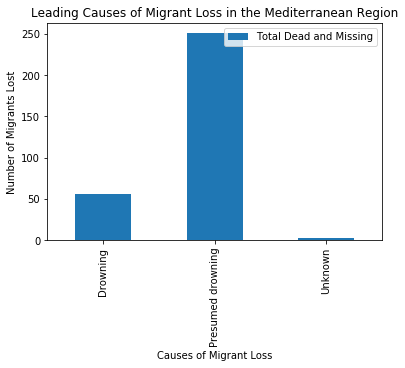

<Figure size 432x288 with 0 Axes>

In [15]:
Mediterranean_sum = Mediterranean_leading_causes_migrant_loss[Mediterranean_leading_causes_migrant_loss["Total Dead and Missing"] > 1]

#Bar Chart
M_Chart = Mediterranean_sum.plot(kind="bar", title="Leading Causes of Migrant Loss in the Mediterranean Region")

M_Chart.set_xlabel("Causes of Migrant Loss")
M_Chart.set_ylabel("Number of Migrants Lost")

plt.show()
plt.tight_layout()

# Save graph
plt.savefig("Visualizations/migrant_loss_mediterranean.png", dpi=180, bbox_inches="tight")


In [17]:
US_Mexico = migrants[migrants["Region of Incident"] == "US-Mexico Border"]

#Groupby leading causes of death for migrants in the US-MExico border
US_Mexico_leading_causes = US_Mexico.groupby("Cause of Death").sum()
US_Mexico_leading_causes_migrant_loss = pd.DataFrame(US_Mexico_leading_causes, columns = ["Total Dead and Missing"])
US_Mexico_leading_causes_migrant_loss

,Total Dead and Missing
Cause of Death,
Dehydration,1
Drowning,4
Hit by vehicle,1
Murdered,1
Presumed drowning,15
Unknown,3
Unknown (skeletal remains),32
Vehicle Accident,3


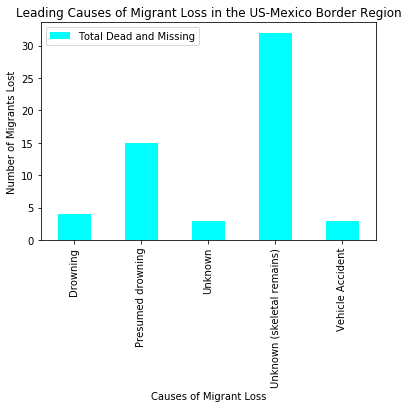

<Figure size 432x288 with 0 Axes>

In [18]:
US_Mexico_sum = US_Mexico_leading_causes_migrant_loss[US_Mexico_leading_causes_migrant_loss["Total Dead and Missing"] > 1]

#Bar Chart
U_Chart = US_Mexico_sum.plot(kind="bar", color = "cyan", title="Leading Causes of Migrant Loss in the US-Mexico Border Region")

U_Chart.set_xlabel("Causes of Migrant Loss")
U_Chart.set_ylabel("Number of Migrants Lost")

plt.show()
plt.tight_layout()

# Save graph
plt.savefig("Visualizations/migrant_loss_border.png", dpi=180, bbox_inches="tight")

### What do we know from this data on the leading causes of migrant loss en route to seeking asylum?

After looking at the 2019 data on migrant loss specifically in the Mediterranean and the US-Mexico border, both of these regions share a couple of similarities in how the reported migrants have fallen short on their destination. In the Meditteranean, most of these migrant losses are attributed to drowning or presumed drowning. Its presumed that many have drowned when trying to cross the Mediterranean into Europe from places such as the Middle East and North Africa. Because these events are often isolated, it can be presumed that those migrants that were lost at sea have drowned before reaching European shores. 

The international border between the US and Mexico differs in that much of the causes of migrant loss are unknown, though skeletal remains have been found and recorded into this set. In terms of known causes of migrant loss, drowning or presumed drowning seems to be the leading cause. This can be explained by a natural river border between the two nations, as the Rio Grande cuts through the border. Crossings on this part of the border experience much of these occurences where drowning takes some of the migrants.